Лабораторная работа № 4 по Нейроинформатике

Сети с радиальными базисными элементами

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 1

Классификация

In [237]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from matplotlib import pyplot as plt
import itertools
from keras import backend
from timeit import default_timer as timer

In [238]:
class RBFLayer(keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(RBFLayer, self).__init__(**kwargs)
    def build(self, input_shape):
        self.mu = self.add_weight(name = "mu",
                                  shape = (input_shape[1], self.output_dim),
                                  initializer = tf.keras.initializers.RandomUniform(minval = -1, maxval = 1),
                                  trainable = True)
        self.sigma = self.add_weight(name = "sigma",
                                     shape = (self.output_dim,),
                                     initializer = "random_normal",
                                     trainable = True)
        super(RBFLayer, self).build(input_shape)
    
    def call(self, inputs):
        diff = backend.expand_dims(inputs) - self.mu
        output = backend.exp(backend.sum(diff ** 2, axis = 1) * self.sigma)
        return output

In [239]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y

In [240]:
def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y

In [241]:
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) - y * np.cos(alpha)
    return xr, yr

In [242]:
t = np.arange(0, 2 * np.pi, 0.001)

Создаём эллипсы и параболу

In [243]:
x1, y1 = ellipse(t, 0.4, 0.15, 0.1, -0.15)
x1, y1 = rotate(x1, y1, np.pi / 6)

x2, y2 = ellipse(t, 0.7, 0.5, 0, 0)
x2, y2 = rotate(x2, y2, np.pi / 3)

x3, y3 = parabola(t, 1, 0, -0.8)
x3, y3 = rotate(x3, y3, np.pi / 2)

Преобразуем данные

In [244]:
d1 = [[[x, y], [1., 0., 0.]] for x, y in zip(x1, y1)]
d2 = [[[x, y], [0., 1., 0.]] for x, y in zip(x2, y2)]
d3 = [[[x, y], [0., 0., 1.]] for x, y in zip(x3, y3)]

Объединяем и перемешиваем

In [245]:
dataset = d1 + d2 + d3
np.random.shuffle(dataset)

Разбиваем на обучающую и тестовую выборки

In [246]:
separ = int(len(dataset) * 0.8)
train_data = dataset[:separ]
test_data = dataset[separ:]

train_input = [i[0] for i in train_data]
train_output = [i[1] for i in train_data]

Создание модели

In [247]:
model = keras.models.Sequential()
model.add(RBFLayer(3, input_dim = 2))
model.add(keras.layers.Dense(3, activation = 'sigmoid'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

Обучение модели

In [248]:
len(train_data)

15081

In [249]:
epochs = 1000
batch_size = int(len(train_data) * 0.01)

time_start = timer()
hist = model.fit(train_input, train_output, batch_size = batch_size, epochs = epochs)
time_end = timer()

Epoch 1/1000
101/101 [==============================] - 0s 1ms/step - loss: 0.2787 - mae: 0.4703
Epoch 2/1000
101/101 [==============================] - 0s 918us/step - loss: 0.2339 - mae: 0.4480
Epoch 3/1000
101/101 [==============================] - 0s 898us/step - loss: 0.2183 - mae: 0.4362
Epoch 4/1000
101/101 [==============================] - 0s 898us/step - loss: 0.2068 - mae: 0.4264
Epoch 5/1000
101/101 [==============================] - 0s 888us/step - loss: 0.1981 - mae: 0.4174
Epoch 6/1000
101/101 [==============================] - 0s 967us/step - loss: 0.1914 - mae: 0.4097
Epoch 7/1000
101/101 [==============================] - 0s 898us/step - loss: 0.1859 - mae: 0.4022
Epoch 8/1000
101/101 [==============================] - 0s 918us/step - loss: 0.1813 - mae: 0.3959
Epoch 9/1000
101/101 [==============================] - 0s 937us/step - loss: 0.1772 - mae: 0.3900
Epoch 10/1000
101/101 [==============================] - 0s 993us/step - loss: 0.1736 - mae: 0.3846
Epoch 11/10

In [250]:
print('Эпох: {0}'.format(epochs))
print('Время обучения: {0} секунд'.format(int(time_end - time_start)))
print('Функция потерь MSE: {0}'.format(min(hist.history['loss'])))
print('Метрика качества MAE: {0}'.format(min(hist.history['mae'])))

Эпох: 1000
Время обучения: 168 секунд
Функция потерь MSE: 0.06215647980570793
Метрика качества MAE: 0.13214363157749176


In [251]:
x = np.linspace(-6, 1, 200)
y = np.linspace(-3, 20, 200)

In [252]:
line = np.array(list(itertools.product(x, y)))
xs, ys = np.hsplit(line, 2)

In [253]:
predicted = model.predict(line)

1250/1250 [==============================] - 1s 917us/step


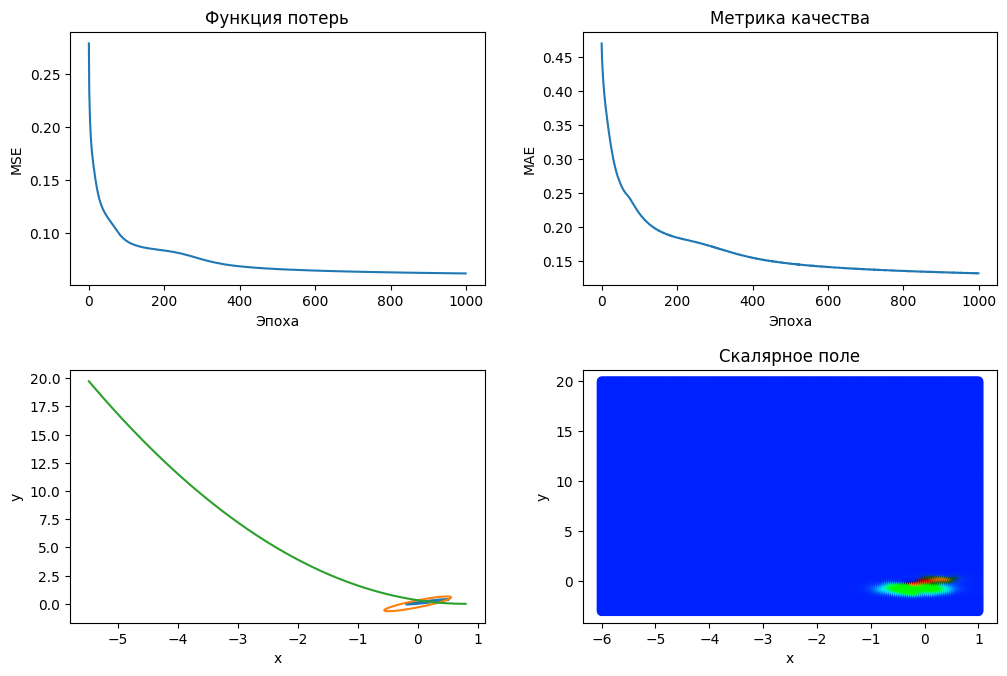

In [254]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6.5))
fig.tight_layout(h_pad = 4, w_pad = 4)

axes[0, 0].set_title('Функция потерь')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].plot(hist.history['loss'])

axes[0, 1].set_title('Метрика качества')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].plot(hist.history['mae'])

axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].plot(x1, y1)
axes[1, 0].plot(x2, y2)
axes[1, 0].plot(x3, y3)

axes[1, 1].set_title('Скалярное поле')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].scatter(xs, ys, c = predicted)